# Geographic Data with Basemap

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

/Volumes/RobStorage/anaconda2/lib/python2.7/site-packages/mpl_toolkits/basemap/__init__.py:3296: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/Volumes/RobStorage/anaconda2/lib/python2.7/site-packages/mpl_toolkits/basemap/__init__.py:3305: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)
/Volumes/RobStorage/anaconda2/lib/python2.7/site-packages/mpl_toolkits/basemap/__init__.py:1623: MatplotlibDeprecationWarning: The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.
  fill_color = ax.get_axis_bgcolor()


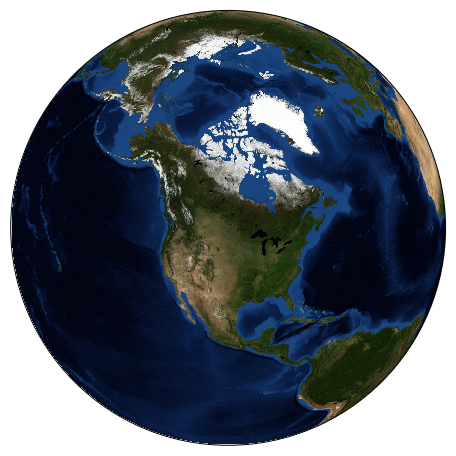

In [2]:
plt.figure(figsize=(8, 8))
m = Basemap(projection='ortho', resolution=None, lat_0=50, lon_0=-100)
m.bluemarble(scale=0.5);

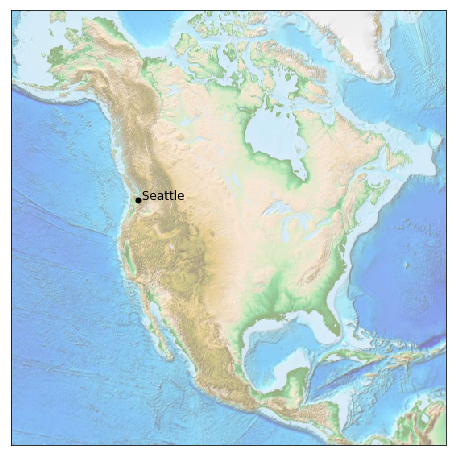

In [12]:
fig = plt.figure(figsize=(8,8))
m = Basemap(projection='lcc', resolution=None, width=8E6, height=8E6,
            lat_0=45, lon_0=-100)
m.etopo(scale=0.5, alpha=0.5)

# Map (lon, lat) to (x, y) for plotting
x, y = m(-122.3, 47.6)
plt.plot(x, y, 'ok', markersize=5)
plt.text(x, y, ' Seattle', fontsize=12);

## Map Projections

In [15]:
from itertools import chain

def draw_map(m, scale=0.2):
    # draw a shaded-relief image
    m.shadedrelief(scale=scale)
    
    # lats and lons are returned as a dictionary
    lats = m.drawparallels(np.linspace(-90, 90, 13))
    lons = m.drawmeridians(np.linspace(-180, 180, 13))
    
    # keys contain the plt.Line2D instances
    lat_lines = chain(*(tup[1][0] for tup in lats.items()))
    lon_lines = chain(*(tup[1][0] for tup in lons.items()))
    all_lines = chain(lat_lines, lon_lines)
    
    # cycle through these lines and set the desired style
    for line in all_lines:
        line.set(linestyle='-', alpha=0.3, color='w')

#### Cylindrical projections

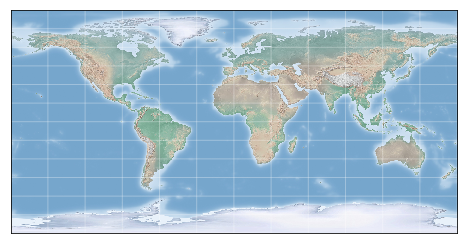

In [16]:
# simplest map projections
fig = plt.figure(figsize=(8,6), edgecolor='w')
m = Basemap(projection='cyl', resolution = None,
            llcrnrlat=-90, urcrnrlat=90,
            llcrnrlon=-180, urcrnrlon=180)
draw_map(m)

#### Pseudo-cylindrical projections

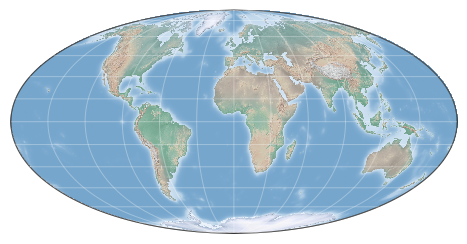

In [7]:
fig = plt.figure(figsize=(8,6), edgecolor='w')
m = Basemap(projection='moll', resolution=None, lat_0=0, lon_0=0)
draw_map(m)

#### Perspective projections

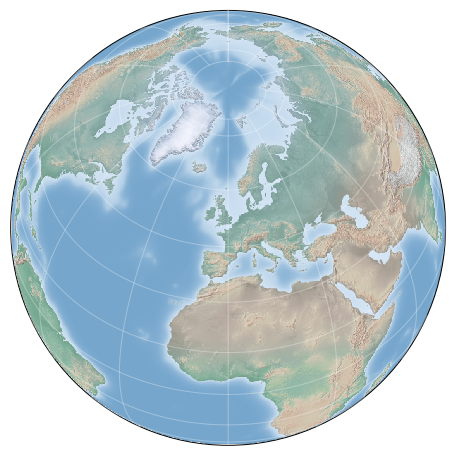

In [8]:
fig = plt.figure(figsize=(8,8))
m = Basemap(projection='ortho', resolution=None, lat_0=50, lon_0=0)
draw_map(m);

#### Conic projections

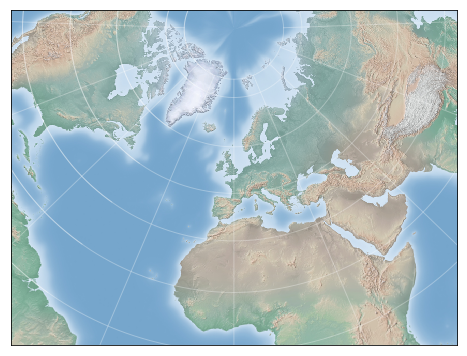

In [9]:
fig = plt.figure(figsize=(8,8))
m = Basemap(projection='lcc', resolution=None, lon_0=0, lat_0=50, lat_1=45, lat_2=55,
            width=1.6E7, height=1.2E7)
draw_map(m)

## Drawing a Map Background
#### Other drawing functions:
 - **Physical boundaries and bodies of water**
     - `drawcoastlines()`: Draw continental coast lines
     - `drawlsmask()`: Draw a mask between the land and sea, for use with projecting images on one of the other
     - `drawmapboundary()`: Draw the map boundary, including the fill color for oceans
     - `drawrivers()`: Draw rivers on the map
     - `fillcontinents()`: Fill the continents with a given color; optionally fill lakes with another color

<br>
 - **Political boundaries**
     - `drawcountries()`: Draw country boundaries
     - `drawstates()`: Draw US state boundaries
     - `drawcounties()`: Draw US county boundaries

<br>
 - **Map Features**
     - `drawgreatcircle()`: Draw a great circle between two points
     - `drawparallels()`: Draw lines of constant latitude
     - `drawmeridians()`: Draw lines of constant longitude
     - `drawmapscale()`: Draw a linear scale on the map
     
<br>
 - **Whole-globe images**
     - `bluemarble()`: Project NASA's blue marble image onto the map
     - `shadedrelief()`: Project a shaded relief image onto the map
     - `etopo()`: Draw an etopo relief image onto the map
     - `warpimage()`: Project a user-provided image onto the map

/Volumes/RobStorage/anaconda2/lib/python2.7/site-packages/mpl_toolkits/basemap/__init__.py:1767: MatplotlibDeprecationWarning: The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.
  axisbgc = ax.get_axis_bgcolor()


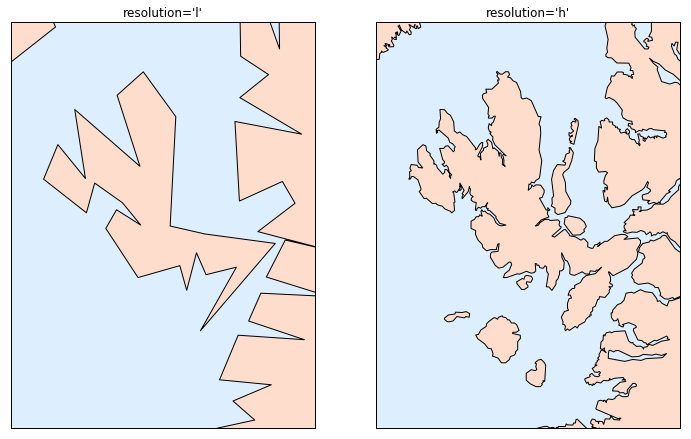

In [17]:
# resolutions are c(crude), l(low), i(intermediate), h(high), f(full), or None

fig, ax = plt.subplots(1, 2, figsize=(12, 8))

for i, res in enumerate(['l', 'h']):
    m = Basemap(projection='gnom', lat_0=57.3, lon_0=-6.2,
                width=90000, height=120000, resolution=res, ax=ax[i])
    m.fillcontinents(color="#FFDDCC", lake_color='#DDEEFF')
    m.drawmapboundary(fill_color="#DDEEFF")
    m.drawcoastlines()
    ax[i].set_title("resolution='{0}'".format(res));

## Plotting Data on Maps

#### Map-specific methods:

 - `contour()/contourf()`: Draw contour lines or filled contours
 - `imshow()`: Draw an image
 - `pcolor()/pcolormesh()`: Draw a pseudocolor plot for irregular/regular meshes
 - `plot()`: Draw lines and/or markers
 - `scatter()`: Draw points with markers
 - `quiver()`: Draw vectors
 - `barbs()`: Draw wind barbs
 - `drawgreatcircle()`: Draw a great circle

## Example: California Cities

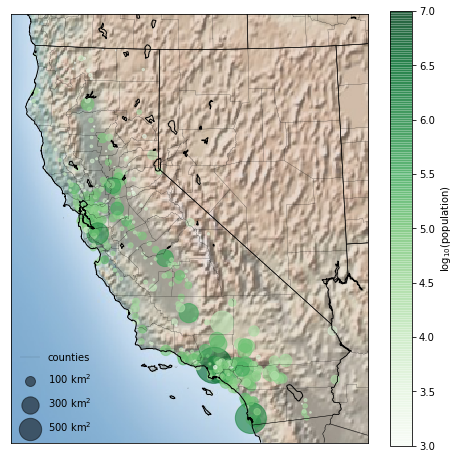

In [23]:
import pandas as pd
cities = pd.read_csv('data/california_cities.csv')

# Extract the data we're interested in
lat = cities['latd'].values
lon = cities['longd'].values
population = cities['population_total'].values
area = cities['area_total_km2'].values

# 1. Draw the map background
fig = plt.figure(figsize=(8,8))
m = Basemap(projection='lcc', resolution='h',
            lat_0=37.5, lon_0= -119,
            width=1.0E6, height=1.2E6)
m.shadedrelief()
m.drawcoastlines(color='black')
m.drawcountries(color='black')
m.drawcounties(color='black')
m.drawstates(color='black')

# 2. Scatter city data, with color reflecting population & size reflecting area
m.scatter(lon, lat, latlon=True, c=np.log10(population), s=area, cmap='Greens', alpha=0.6)

# 3. Create colorbar and legend
plt.colorbar(label=r'$\log_{10}({\rm population})$')
plt.clim(3, 7)

# make legend with dummy points
for a in [100, 300, 500]:
    plt.scatter([], [], c='k', alpha=0.5, s=a, label=str(a) + ' km$^2$')
plt.legend(scatterpoints=1, frameon=False, labelspacing=1, loc='lower left');

## Example: Surface Temperature Data

In [21]:
from netCDF4 import Dataset

In [22]:
data = Dataset('data/gistemp250.nc')

In [24]:
from netCDF4 import date2index
from datetime import datetime
timeindex = date2index(datetime(2014, 1, 15), data.variables['time'])

In [25]:
lat = data.variables['lat'][:]
lon = data.variables['lon'][:]
lon, lat = np.meshgrid(lon, lat)
temp_anomaly = data.variables['tempanomaly'][timeindex]

/Volumes/RobStorage/anaconda2/lib/python2.7/site-packages/mpl_toolkits/basemap/__init__.py:3413: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/Volumes/RobStorage/anaconda2/lib/python2.7/site-packages/mpl_toolkits/basemap/__init__.py:3422: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


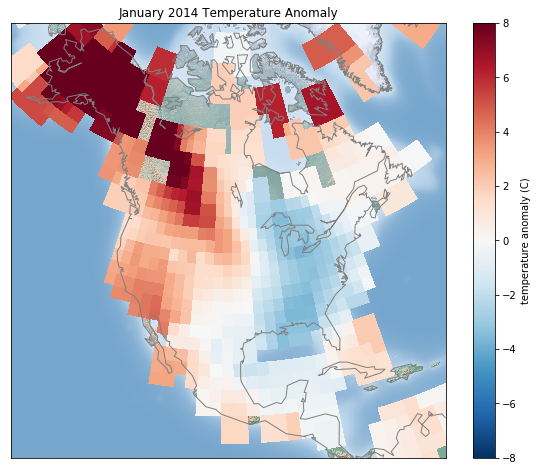

In [27]:
fig = plt.figure(figsize=(10, 8))
m = Basemap(projection='lcc', resolution='c', width=8.0E6, height=8.0E6,
            lat_0=45, lon_0=-100)
m.shadedrelief(scale=0.5)
m.pcolormesh(lon, lat, temp_anomaly, latlon=True, cmap='RdBu_r')
plt.clim(-8, 8)
m.drawcoastlines(color='gray')

plt.title('January 2014 Temperature Anomaly')
plt.colorbar(label='temperature anomaly (C)');